<a href="https://colab.research.google.com/github/hanafimajid/h2o-mtr/blob/main/h2o_jura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Installing the H2O package
!pip install h2o
# Importing necessary packages
import h2o
from h2o.automl import H2OAutoML

# Initialize H2O
h2o.init()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 2.9 MB/s eta 0:00:00
Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp2djciybj
  JVM stdout: /tmp/tmp2djciybj/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp2djciybj/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,22 days
H2O_cluster_name:,H2O_from_python_unknownUser_wh90xu
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
#importing data from a local CSV file
from google.colab import files
uploaded = files.upload()

Saving csv_result-jura.csv to csv_result-jura.csv


In [ ]:
import pandas as pd
df = pd.read_csv("csv_result-jura.csv")
df.head()
y_col = [
'Cd',
'Cu',
'Pb',
# 'Y4',
# 'Y5',
# 'Y6'
]
y = df[y_col]
y.head()
#X_col = ['Xloc','Yloc','Cr','Ni','Zn','Co']
#X = df[X_col]
X = df[df.columns.drop(y)]
#X=df.drop(columns=['Cd','Cu','Pb'])
y.head()


,Cd,Cu,Pb
0,1.740,25.72,77.36
1,1.335,24.76,77.88
2,1.610,8.88,30.80
3,2.150,22.70,56.40
4,1.565,34.32,66.40


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size = 0.20, random_state = 123)

In [ ]:
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)
y_train.fillna(y_train.mean(), inplace=True)
y_test.fillna(y_test.mean(), inplace=True)
X_train.head(10)

,Xloc,Yloc,Landuse=1,Landuse=2,Landuse=3,Landuse=4,Rock=1,Rock=2,Rock=3,Rock=4,Rock=5,Cr,Ni,Zn,Co
211,2.220,2.732,0,1,0,0,0,1,0,0,0,43.48,23.88,62.28,12.28
328,2.251,3.288,0,0,1,0,0,0,0,0,1,14.92,4.68,26.80,1.92
102,3.590,4.033,0,1,0,0,0,0,1,0,0,56.40,24.84,79.60,7.92
332,2.218,1.485,0,1,0,0,1,0,0,0,0,34.08,16.36,70.00,12.04
228,3.308,2.963,0,0,1,0,0,0,0,0,1,36.00,23.92,78.40,17.32
282,2.326,3.633,0,0,1,0,1,0,0,0,0,20.12,6.28,40.72,2.36
156,3.470,5.555,0,1,0,0,0,1,0,0,0,45.20,29.68,64.00,13.48
157,1.839,0.995,0,0,1,0,1,0,0,0,0,24.88,10.12,56.00,4.24
121,3.136,2.091,0,0,1,0,0,1,0,0,0,34.80,30.32,79.00,14.20
260,3.589,4.443,0,0,1,0,1,0,0,0,0,40.80,21.52,112.80,10.80


In [ ]:
from h2o.sklearn import H2OAutoMLRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

In [ ]:
class MultiOutputTP(object):
  def __init__(self, *args, **kwargs):
    self.args = args
    self.kwargs = kwargs
  def fit(self, X, y):
    X, y = map(np.atleast_2d, (X, y))
    assert X.shape[0] == y.shape[0]
    yy = y.shape[1]
    self.regs = []
    for i in range(yy):
#while i <= Ny:
      #reg = TPOTRegressor(generations=5, population_size=50,verbosity=2, random_state=123,n_jobs=1, max_time_mins=None, max_eval_time_mins=5, cv=10,scoring='neg_mean_squared_error')
      #reg = LinearSVR(epsilon=0.0, tol=0.0001, C=1.0, loss='epsilon_insensitive', fit_intercept=True, intercept_scaling=1.0, dual=True, verbose=1, random_state=123, max_iter=10000)
      reg=H2OAutoMLRegressor(stopping_metric="RMSE",max_runtime_secs=240,keep_cross_validation_predictions = True, max_models=100, seed=42, sort_metric="RMSE")
      #reg=H2OAutoML(stopping_metric="RMSE",sort_metric="RMSE",nfolds=10)
      Xi = np.hstack([X, y[:, :i]])
      yi = y[:, i]
      #h2o.make_leaderboard(reg,extra_columns = 'ALL')


      self.regs.append(reg.fit(Xi, yi))


    return self
  def predict(self, X):
    y = np.empty([X.shape[0], len(self.regs)])
    for i, reg in enumerate(self.regs):
      y[:, i] = reg.predict(np.hstack([X, y[:, :i]]))
    return y

In [ ]:
import numpy as np

#decorators.MAX_EVAL_SECS = 240
reg2 = MultiOutputTP(1).fit(X_train, y_train)



Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
y_test

,Cd,Cu,Pb
164,0.260,9.24,27.00
48,1.070,10.88,29.88
11,1.425,8.76,56.40
159,1.915,19.32,45.72
41,1.003,21.20,48.80
...,...,...,...
189,3.530,66.00,118.00
306,0.585,15.16,56.40
128,1.360,8.68,53.60
107,1.930,77.32,157.28


In [ ]:
X_test

,Xloc,Yloc,Landuse=1,Landuse=2,Landuse=3,Landuse=4,Rock=1,Rock=2,Rock=3,Rock=4,Rock=5,Cr,Ni,Zn,Co
164,1.897,1.220,0,0,1,0,1,0,0,0,0,16.24,4.76,27.20,3.480
48,3.454,4.654,0,1,0,0,0,0,0,0,1,38.24,19.92,70.80,7.800
11,2.699,1.199,1,0,0,0,1,0,0,0,0,40.80,15.72,66.80,7.560
159,2.774,1.544,0,1,0,0,0,0,1,0,0,42.32,20.64,90.24,8.440
41,1.813,2.116,0,0,1,0,0,0,1,0,0,33.48,20.56,110.00,11.320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,1.857,0.659,0,1,0,0,0,0,1,0,0,52.80,24.44,124.80,10.080
306,1.452,1.290,0,0,1,0,1,0,0,0,0,39.88,13.20,51.20,5.800
128,2.850,1.890,1,0,0,0,0,1,0,0,0,10.76,7.08,28.88,2.816
107,2.969,0.778,0,1,0,0,0,1,0,0,0,43.04,33.76,166.28,12.440


In [ ]:
Ypred2 = reg2.predict(X_test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [ ]:
Ypred2

array([[  0.44696916,   3.91195427,  30.87824249],
       [  1.50341663,  20.76990395,  41.82757568],
       [  1.09257767,  14.08647693,  47.0180397 ],
       [  1.45166145,  34.29039496,  70.45153046],
       [  1.36635881,  51.77657174,  92.31807709],
       [  0.54708167,   7.34571025,  25.03117561],
       [  1.37273309,  16.97430069,  56.71570969],
       [  2.54743665,  27.99989466,  57.5447464 ],
       [  1.21392453,  28.40897137,  52.70060349],
       [  1.05215832,   9.25405056,  40.17373276],
       [  1.79003814,  33.46792768,  58.60210419],
       [  1.43919319,   8.6899916 ,  51.21939087],
       [  1.31671109,  24.03752781,  52.3598175 ],
       [  0.88760413,  30.24705911,  64.84161377],
       [  0.88357458,  31.67662503,  75.90157318],
       [  0.74083922,   2.17955988,  31.94685936],
       [  1.09960317,  24.83447536,  59.09386444],
       [  0.3895761 ,   9.15406567,  20.66609192],
       [  0.50124265,  14.29640832,  40.0030365 ],
       [  1.36047712,  52.11357

In [ ]:
from sklearn.metrics import r2_score
r2 = np.abs(r2_score(y_test, Ypred2))
print('r2 score for perfect model is', r2)

r2 score for perfect model is 0.4061738649042845


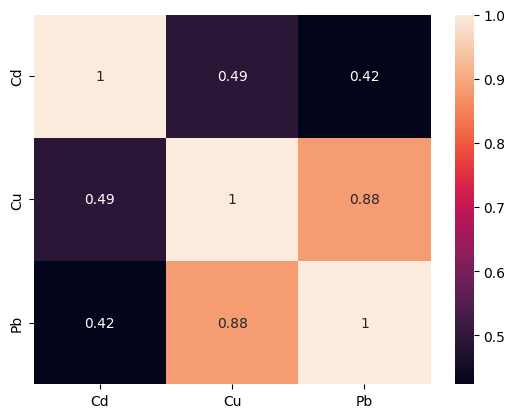

In [ ]:
from tables import Column
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
# taking all rows but only 6 columns
df_small=pd.DataFrame(Ypred2)
#df_small = y_test.iloc[:,:3]
features=['Cd',
'Cu',
'Pb']
correlation_mat = df_small.corr('pearson')
sns.heatmap(correlation_mat, annot = True,yticklabels=features,xticklabels=features)
plt.show()

In [ ]:
import math
import numpy as np
from statistics import mean
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
rmse3=math.sqrt(mean_squared_error(y_test, Ypred2))
print('RMSE  is',rmse3)
mae3=mean_absolute_error(y_test, Ypred2)
print('MAE  is',mae3)




# Calculate RMSE for each output
rmse_per_output = np.sqrt(mean_squared_error(y_test, Ypred2, multioutput='raw_values'))
print('rmse_per_output:',rmse_per_output)

def relative_root_mean_squared_error(true, pred):
    n = len(true) # update
    num = np.sum(np.square(true - pred)) / n  # update
    den = np.sum(np.square(pred))
    squared_error = num/den
    rrmse_loss = np.sqrt(squared_error)
    return rrmse_loss


rrmse3=relative_root_mean_squared_error(y_test,Ypred2)
arrmse3=np.mean(rrmse3)
percentage_average_relative_rmse3 = arrmse3 * 100
print("relative_root_mean_squared_error =", rrmse3)
print("arrmse =", arrmse3)
print(f"Percentage arrmse = {percentage_average_relative_rmse3:.2f}%")

RMSE  is 15.872829348422714
MAE  is 8.971458344921055
rmse_per_output: [ 0.59075886 13.31972524 24.04321231]
relative_root_mean_squared_error = Cd    0.000992
Cu    0.022378
Pb    0.040393
dtype: float64
arrmse = 0.021254538167733667
Percentage arrmse = 2.13%
